# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Frederick
- **Email:** m319b4ky1553@bangkit.academy
- **ID Dicoding:** m319b4ky1553

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Apa 10 besar produk yang paling banyak dibeli dan 10 produk termahal yang terdapat pada data?
- Pertanyaan 2 : Bagaimana pengaruh lama waktu pengiriman rata-rata terhadap review score yang diberikan?
- Pertanyaan 3 : Berapa pengeluaran customer untuk setiap bulannya?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
customers_df=pd.read_csv("https://raw.githubusercontent.com/Frederickyzw/analisis_data_dicoding/refs/heads/main/data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
order_items_df=pd.read_csv("https://raw.githubusercontent.com/Frederickyzw/analisis_data_dicoding/refs/heads/main/data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [4]:
order_payments_df = pd.read_csv("https://raw.githubusercontent.com/Frederickyzw/analisis_data_dicoding/refs/heads/main/data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [5]:
order_reviews_df=pd.read_csv("https://raw.githubusercontent.com/Frederickyzw/analisis_data_dicoding/refs/heads/main/data/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [6]:
orders_df=pd.read_csv("https://raw.githubusercontent.com/Frederickyzw/analisis_data_dicoding/refs/heads/main/data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
product_cnt_df = pd.read_csv("https://raw.githubusercontent.com/Frederickyzw/analisis_data_dicoding/refs/heads/main/data/product_category_name_translation.csv")
product_cnt_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [8]:
products_df = pd.read_csv("https://raw.githubusercontent.com/Frederickyzw/analisis_data_dicoding/refs/heads/main/data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [9]:
sellers_df = pd.read_csv("https://raw.githubusercontent.com/Frederickyzw/analisis_data_dicoding/refs/heads/main/data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Cara mengakses file csv dengan library pandas
- Membandingkan setiap parameter yang ada pada file csv yang diakses

### Assessing Data

#### Menilai tabel customers_df

In [10]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [11]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [12]:
print("Jumlah duplikasi : ", customers_df.duplicated().sum())

Jumlah duplikasi :  0


In [13]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Menilai tabel order_items_df

In [14]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [15]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [16]:
print("Jumlah duplikasi : ", order_items_df.duplicated().sum())

Jumlah duplikasi :  0


In [17]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Menilai tabel orders_df

In [18]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [19]:
print("Jumlah duplikasi : ", orders_df.duplicated().sum())

Jumlah duplikasi :  0


In [20]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [21]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [22]:
orders_df.groupby(by="order_status").count()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_status,,,,,,,
approved,2,2,2,2,0,0,2
canceled,625,625,625,484,75,6,625
created,5,5,5,0,0,0,5
delivered,96478,96478,96478,96464,96476,96470,96478
invoiced,314,314,314,314,0,0,314
processing,301,301,301,301,0,0,301
shipped,1107,1107,1107,1107,1107,0,1107
unavailable,609,609,609,609,0,0,609


####Menilai tabel order_payments_df

In [23]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [24]:
order_payments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [25]:
print("Jumlah duplikasi : ", order_payments_df.duplicated().sum())

Jumlah duplikasi :  0


In [26]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Menilai tabel order_reviews_df

In [27]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [28]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [29]:
print("Jumlah duplikasi : ", order_reviews_df.duplicated().sum())

Jumlah duplikasi :  0


In [30]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


####Menilai tabel orders_df

In [31]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [32]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [33]:
print("Jumlah duplikasi : ", orders_df.duplicated().sum())

Jumlah duplikasi :  0


####Menilai tabel product_cnt_df

In [34]:
product_cnt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [35]:
product_cnt_df.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [36]:
print("Jumlah duplikasi : ", product_cnt_df.duplicated().sum())

Jumlah duplikasi :  0


In [37]:
product_cnt_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


####Menilai tabel products_df

In [38]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [39]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [40]:
print("Jumlah duplikasi : ", products_df.duplicated().sum())

Jumlah duplikasi :  0


In [41]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


####Menilai tabel sellers_df

In [42]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [43]:
sellers_df.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [44]:
print("Jumlah duplikasi : ", sellers_df.duplicated().sum())

Jumlah duplikasi :  0


In [45]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- Mengetahui terdapat data dengan Data type yang kurang sesuai
- Mengetahui parameter yang null (tidak memiliki isi)

### Cleaning Data

####Membersihkan tabel orders_df

In [46]:
datetime_columns = ["order_purchase_timestamp",
                    "order_approved_at",
                    "order_delivered_carrier_date",
                    "order_delivered_customer_date",
                    "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


####Membersihkan tabel order_reviews_df



In [47]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [48]:
order_reviews_df.fillna(value="Prefer not to say", inplace=True)
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


####Membersihkan tabel order_items_df

In [49]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Insight:**
- Memeriksa parameter data yang harus dilakukan cleaning
- Mengubah data type parameter yang salah

## Exploratory Data Analysis (EDA)

#### Explore customers_df

In [50]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [51]:
customers_df.customer_id.is_unique

True

In [52]:
customers_df.groupby(by="customer_state").agg({
    "customer_id": "nunique",
    "customer_city": "nunique",
    "customer_zip_code_prefix": "count"
})

,customer_id,customer_city,customer_zip_code_prefix
customer_state,,,
AC,81,8,81
AL,413,68,413
AM,148,5,148
AP,68,6,68
BA,3380,353,3380
CE,1336,161,1336
DF,2140,6,2140
ES,2033,95,2033
GO,2020,178,2020


In [53]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


####Explore order_payments_df

In [54]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [55]:
order_payments_df.groupby(by="payment_type").agg({
    "payment_installments": "count",
    "payment_value": "sum"
})

,payment_installments,payment_value
payment_type,,
boleto,19784,2869361.27
credit_card,76795,12542084.19
debit_card,1529,217989.79
not_defined,3,0.00
voucher,5775,379436.87


####Explore orders_df

In [56]:
time_delivery = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
time_delivery = time_delivery.apply(lambda x: x.total_seconds())
orders_df["time_delivery"] = round(time_delivery/86400)

<Axes: >

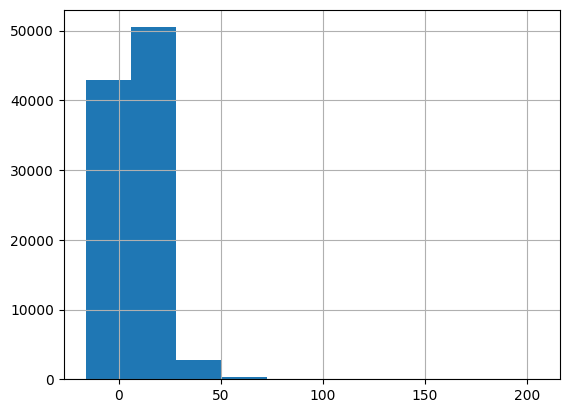

In [57]:
orders_df.time_delivery.hist()

In [58]:
customer_id_in_orders_df = orders_df["customer_id"].values
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Inactive")
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
70358,cdb833f7133ef2039a36e2cf5bd7a009,724f1b32e4be91e47f76c0abe137742f,13097,campinas,SP,Active
37291,01690063395d386d320ea8f5a60cdece,a9fbcde432c048fe5741d2c14006640d,65930,acailandia,MA,Active
78763,3e64181a017ab86b5d35ad23c3f0ee38,09caca3fd11f5b9681118b007d46f76b,81900,curitiba,PR,Active
95263,d02b1aeda74d6f9369eaa0e15dde1711,8b1bd4e07c9108c6d1d82d4a3c58aea6,85415,cafelandia,PR,Active
20118,70c787ceba70e4f8cd193ed9f7e0f7d0,8add6b79d3951387714fddbffdb3bb72,13633,pirassununga,SP,Active


In [59]:
customers_df.groupby(by="status").customer_id.count()

,customer_id
status,
Active,99441


####Menggabungkan data customers_df dan orders_df

In [60]:
orders_customers_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_delivery
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,14.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,10.0


In [61]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
campinas,1444
porto alegre,1379
salvador,1245
guarulhos,1189


In [62]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


In [63]:
orders_customers_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


####Menggabungkan data order_items_df dan sellers_df

In [64]:
item_sellers_df = pd.merge(
    left=order_items_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
item_sellers_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [65]:
item_sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
guarulhos,50
ibitinga,49
santo andre,45
campinas,41


####Menggabungkan data order_payments_df dan order_reviews_df

In [66]:
payment_reviews_df = pd.merge(
    left=order_payments_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
payment_reviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,Prefer not to say,Prefer not to say,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,Prefer not to say,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,Prefer not to say,Prefer not to say,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,Prefer not to say,Prefer not to say,2017-12-21,2017-12-22 01:10:39


In [67]:
payment_reviews_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


####Menggabungkan data product_cnt_df dan products_df

In [68]:
cnt_products_df = pd.merge(
    left=product_cnt_df,
    right=products_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
cnt_products_df.head()

,product_category_name,product_category_name_english,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,beleza_saude,health_beauty,e3e020af31d4d89d2602272b315c3f6e,58.0,1987.0,3.0,75.0,21.0,7.0,13.0
1,beleza_saude,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0
2,beleza_saude,health_beauty,36555a2f528d7b2a255c504191445d39,51.0,1069.0,1.0,1467.0,23.0,16.0,20.0
3,beleza_saude,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,40.0,1469.0,3.0,1050.0,18.0,21.0,27.0
4,beleza_saude,health_beauty,75b4372e69a42f8ae1d908c076f547b2,22.0,1313.0,1.0,938.0,29.0,22.0,23.0


In [69]:
cnt_products_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
automotivo,1900
informatica_acessorios,1639
brinquedos,1411
relogios_presentes,1329


###Menggabungkan data orders_customers_df dan payment_reviews_df

In [70]:
or_cus_pay_rev_df = pd.merge(
    left=orders_customers_df,
    right=payment_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
or_cus_pay_rev_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,Prefer not to say,Prefer not to say,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,Prefer not to say,Prefer not to say,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,Prefer not to say,Prefer not to say,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,Prefer not to say,Prefer not to say,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


###Menggabungkan data item_sellers_df dan cnt_products_df

In [71]:
it_sel_cnt_prod_df = pd.merge(
    left=item_sellers_df,
    right=cnt_products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
it_sel_cnt_prod_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,cool_stuff,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP,pet_shop,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG,moveis_decoracao,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP,perfumaria,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR,ferramentas_jardim,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [72]:
it_sel_cnt_prod_df.groupby(by="product_category_name_english").agg({
    "price": "mean",
    "product_photos_qty": "sum"
})

,price,product_photos_qty
product_category_name_english,,
agro_industry_and_commerce,342.124858,498.0
air_conditioning,185.269226,700.0
art,115.802105,395.0
arts_and_craftmanship,75.583750,89.0
audio,139.254121,681.0
...,...,...
stationery,91.753369,7276.0
tablets_printing_image,90.703735,155.0
telephony,71.213978,13193.0


##Explore All Data

###Menghubungkan semua data

In [73]:
all_df = pd.merge(
    left=or_cus_pay_rev_df,
    right=it_sel_cnt_prod_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,seller_state,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,SP,moveis_escritorio,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,SC,utilidades_domesticas,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,SP,moveis_escritorio,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,SP,moveis_escritorio,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,SP,casa_conforto,home_confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0


In [74]:
all_df.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "price": ["max", "min", "mean"],
    "product_photos_qty": "sum"
})

price                  \
                                                      max     min    mean   
customer_city       product_category_name_english                           
abadia dos dourados books_general_interest          39.90   39.90   39.90   
                    cool_stuff                     199.00  199.00  199.00   
                    sports_leisure                 120.00  120.00  120.00   
abadiania           small_appliances               949.99  949.99  949.99   
abaete              baby                            65.00   65.00   65.00   
...                                                   ...     ...     ...   
ze doca             food_drink                      65.00   65.00   65.00   
                    garden_tools                    39.90   39.90   39.90   
                    musical_instruments            359.00  359.00  359.00   
                    sports_leisure                 149.90  149.90  149.90   
zortea              computers_accessories           69.90   69.90   69.90   

                                                  product_photos_qty  
                                                                 sum  
customer_city       product_category_name_english                     
abadia dos dourados books_general_interest                       2.0  
                    cool_stuff                                   1.0  
                    sports_leisure                               1.0  
abadiania           small_appliances                             6.0  
abaete              baby                                         1.0  
...                                                              ...  
ze doca             food_drink                                   1.0  
                    garden_tools                                 1.0  
                    musical_instruments                          5.0  
                    sports_leisure                               6.0  
zortea              computers_accessories                        3.0  

[25199 rows x 4 columns]

In [75]:
all_df.groupby(by=["customer_state", "customer_city"]).agg({
    "price": ["max", "min", "mean"],
    "product_photos_qty": "sum"
})

price                      \
                                           max     min        mean   
customer_state customer_city                                         
AC             brasileia                 19.90   19.90   19.900000   
               cruzeiro do sul          839.99   47.90  319.263333   
               epitaciolandia            92.34   92.34   92.340000   
               manoel urbano            194.99  194.99  194.990000   
               porto acre                74.90   74.90   74.900000   
...                                        ...     ...         ...   
TO             silvanopolis             229.99  229.99  229.990000   
               sitio novo do tocantins  149.90   55.00   78.725000   
               taguatinga               149.90   59.90  118.596667   
               tocantinopolis           370.00   14.90   91.456250   
               xambioa                  199.70   13.99  111.226667   

                                       product_photos_qty  
                                                      sum  
customer_state customer_city                               
AC             brasileia                              3.0  
               cruzeiro do sul                        6.0  
               epitaciolandia                         2.0  
               manoel urbano                          1.0  
               porto acre                             4.0  
...                                                   ...  
TO             silvanopolis                           3.0  
               sitio novo do tocantins                7.0  
               taguatinga                             4.0  
               tocantinopolis                        12.0  
               xambioa                                6.0  

[4310 rows x 4 columns]

**Insight:**
- Mampu menggabungkan data dua file dengan menggunakan key yang sama
- Mampu melihat dan membandingkan hubungan yang terdapat pada setiap key

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa 10 besar produk yang paling banyak dibeli dan 10 produk termahal yang terdapat pada data?

In [76]:
sum_order_items_df = all_df.groupby("product_category_name_english").product_id.count().sort_values(ascending=False).reset_index()
sum_order_items_df.head(10)

,product_category_name_english,product_id
0,bed_bath_table,11988
1,health_beauty,10032
2,sports_leisure,9004
3,furniture_decor,8832
4,computers_accessories,8150
5,housewares,7380
6,watches_gifts,6213
7,telephony,4726
8,garden_tools,4590
9,auto,4400


In [77]:
max_price_items_df = all_df.groupby("product_category_name_english").price.max().sort_values(ascending=False).reset_index()
max_price_items_df.head(10)

,product_category_name_english,price
0,housewares,6735.00
1,computers,6729.00
2,art,6499.00
3,small_appliances,4799.00
4,musical_instruments,4399.87
5,consoles_games,4099.99
6,sports_leisure,4059.00
7,watches_gifts,3999.90
8,garden_tools,3930.00
9,baby,3899.00


<ipython-input-78-3c058e033bab>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="product_id", y="product_category_name_english", data=sum_order_items_df.head(10), palette=colors, ax=ax[0])
<ipython-input-78-3c058e033bab>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="price", y="product_category_name_english", data=max_price_items_df.head(10), palette=colors, ax=ax[1])


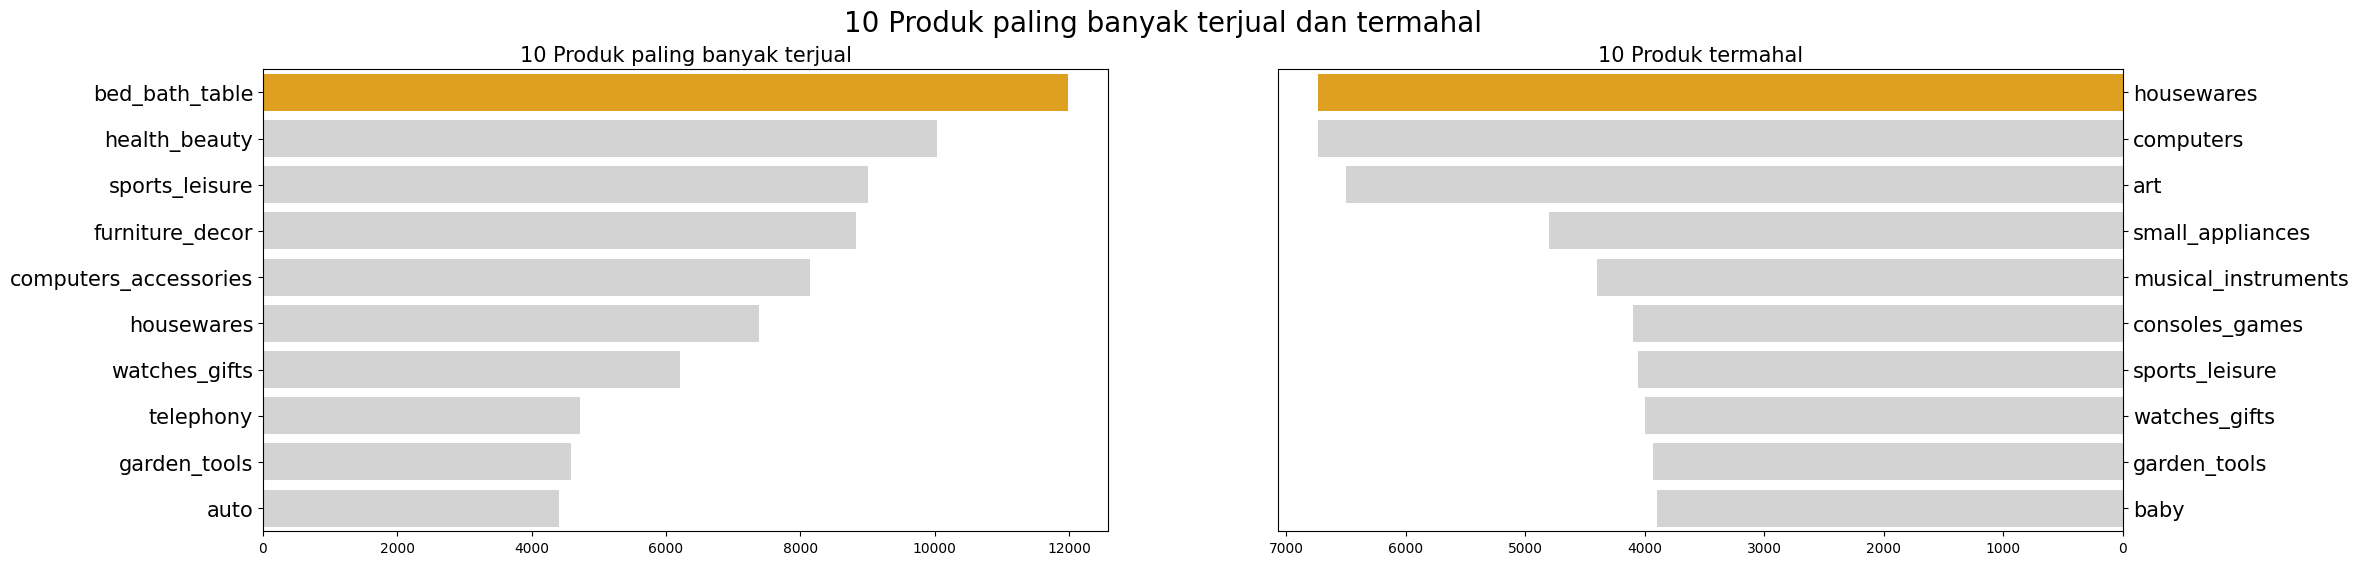

In [78]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#ffa900", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="product_id", y="product_category_name_english", data=sum_order_items_df.head(10), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("10 Produk paling banyak terjual", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="price", y="product_category_name_english", data=max_price_items_df.head(10), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.tick_right()
ax[1].set_title("10 Produk termahal", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("10 Produk paling banyak terjual dan termahal", fontsize=20)
plt.show()

### Pertanyaan 2: Bagaimana pengaruh lama waktu pengiriman rata-rata terhadap review score yang diberikan?

In [79]:
delivery_time_df = all_df.groupby("review_score").time_delivery.mean().sort_values(ascending=False).reset_index()
delivery_time_df.head()

,review_score,time_delivery
0,1.0,14.929791
1,2.0,11.736086
2,3.0,10.371088
3,4.0,8.949165
4,5.0,7.702423


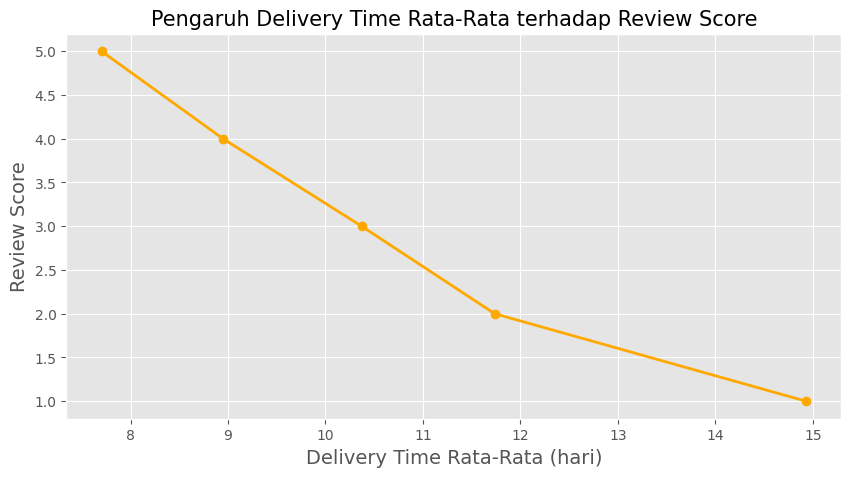

In [80]:
plt.figure(figsize=(10, 5))
plt.style.use('ggplot')
plt.plot(
    delivery_time_df["time_delivery"],
    delivery_time_df["review_score"],
    marker='o',
    linewidth=2,
    color="#ffa900"
)
plt.title("Pengaruh Delivery Time Rata-Rata terhadap Review Score", loc="center", fontsize=15)
plt.xlabel("Delivery Time Rata-Rata (hari)", fontsize=14)
plt.ylabel("Review Score", fontsize=14)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

###Pertanyaan 3 : Berapa pengeluaran customer untuk setiap bulannya?

In [81]:
monthly_orders_df = all_df.resample(rule='M', on='order_approved_at').agg({
    "payment_value": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B') #mengubah format order date menjadi nama bulan

monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "payment_value": "spending"
}, inplace=True)

monthly_final_df = monthly_orders_df.sort_values("spending").drop_duplicates("order_approved_at", keep="last")

In [82]:
months = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}
monthly_final_df["month_number"] = monthly_final_df["order_approved_at"].map(months)
monthly_final_df = monthly_final_df.sort_values("month_number")
monthly_final_df = monthly_final_df.drop("month_number", axis=1)

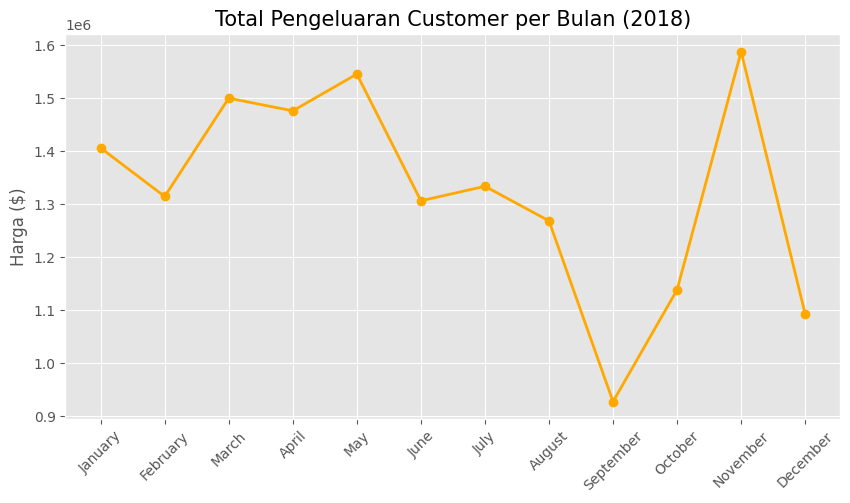

In [83]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_final_df["order_approved_at"], monthly_final_df["spending"], marker='o', linewidth=2, color="#ffa900")
plt.title("Total Pengeluaran Customer per Bulan (2018)", loc="center", fontsize=15)
plt.ylabel("Harga ($)")
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

**Insight:**
- Kategori Produk Terpopuler dan Termahal : Meskipun produk dengan harga tinggi mungkin memiliki permintaan yang lebih rendah, ada keseimbangan antara popularitas dan harga yang dapat dimanfaatkan untuk mengoptimalkan strategi penjualan
- Pengaruh Waktu Pengiriman terhadap Review Score :  Mempercepat proses pengiriman dapat menjadi salah satu strategi penting untuk meningkatkan kepuasan dan loyalitas pelanggan.
- Pola Pengeluaran Pelanggan per Bulan : Dapat digunakan untuk menyusun strategi promosi dan stok barang secara lebih efektif, dengan fokus pada bulan-bulan yang menunjukkan peningkatan pengeluaran pelanggan.

## Analisis Lanjutan (Opsional)

## Conclusion

- **Conclusion pertanyaan 1** : Berdasarkan gambar tersebut, kategori **bed_bath_table** merupakan produk yang paling banyak terjual, diikuti oleh **health_beauty**, **sports_leisure**, dan **furniture_decor**, sementara produk seperti **computers**, **housewares**, dan **art** termasuk dalam daftar produk termahal. Menariknya, hanya **housewares** yang muncul di kedua daftar, menunjukkan bahwa produk ini tidak hanya laku keras tetapi juga berharga tinggi. Produk teknologi seperti **computers** dan **small_appliances** mendominasi daftar termahal, meskipun tidak termasuk yang paling banyak dibeli. Produk **bed_bath_table** menonjol dalam volume penjualan, tetapi tidak termasuk kategori produk dengan harga tertinggi.
- **Conclusion pertanyaan 2** : Semakin lama waktu pengiriman, semakin rendah skor ulasan yang diberikan oleh pelanggan. Hal ini terlihat dari data yang menunjukkan bahwa ketika waktu pengiriman rata-rata sekitar 7,7 hari, review score mencapai 5, sedangkan ketika waktu pengiriman mencapai 14,9 hari, review score turun menjadi 1. Artinya, ketepatan waktu pengiriman merupakan faktor penting dalam memengaruhi kepuasan pelanggan, di mana pengiriman yang lebih cepat cenderung menghasilkan ulasan yang lebih baik.
- **Conclusion pertanyaan 3** : Berdasarkan grafik **Total Pengeluaran Pelanggan per Bulan (2018)**, pengeluaran pelanggan bervariasi setiap bulannya. Puncak pengeluaran terjadi pada bulan **November**, di mana pelanggan menghabiskan lebih dari $\$$1,5 juta, kemungkinan karena adanya periode promosi atau liburan. Pengeluaran juga cukup tinggi pada bulan **April** dan **Mei** dengan angka mendekati $\$$1,5 juta. Sebaliknya, bulan **September** menunjukkan pengeluaran terendah, di bawah $\$$1 juta. Setelah penurunan tajam pada bulan September, pengeluaran kembali meningkat tajam di **Oktober** dan mencapai puncaknya di **November**, sebelum mengalami penurunan kembali di bulan **Desember**.

### Convert all_data ke .csv

In [84]:
all_df.to_csv("main_data.csv", index=False)